In [1]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

In [2]:
%display latex

Definimos una variedad $M$ tipo Lorentziana, dimensión 4 y un sistema de coordenadas esféricas $X$.

In [3]:
M=Manifold(4,'M', structure='Lorentzian')
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\phi')
X

Chart (M, (t, r, th, ph))

Definimos una aplicación de M a R3

In [4]:
#variedad R3
R3=Manifold(3,'R^3', latex_name=r'\mathbb{R}^3') 
#carta en R3
X3.<x,y,z>=R3.chart() 

#La aplicación se llama "to_R3". Entre los corchetes se
#escribe X3_i(X)
to_R3=M.diff_map(R3, {(X,X3): [r*sin(th)*cos(ph),
                               r*sin(th)*sin(ph), r*cos(th)]})
to_R3.display()

M --> R^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

Definimos la métrica de Shwarzschild

In [5]:
#métrica g en la variedad M
g=M.metric()
#definimos la variable m. Esta representa la masa gravitacional sentida
#por un observador localizado a grandes valores de r (Gorgoulhon p127)
m=var('m'); assume (m>=0) 
#definimos cada una de las componentes g en la carta X
g[0,0],g[1,1]=-(1-2*m/r),1/(1-2*m/r)
g[2,2],g[3,3]=r^2,(r*sin(th))^2
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [81]:
g[:]

[     2*m/r - 1              0              0              0]
[             0 -1/(2*m/r - 1)              0              0]
[             0              0            r^2              0]
[             0              0              0  r^2*sin(th)^2]

Símbolos de Christoffel para $\boldsymbol{g}$

In [80]:
g.christoffel_symbols_display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

Para definir la geodésica, definimos un punto inicial y un vector tangente

In [60]:
#punto p0 en t=0, r=0.8m, theta=pi/2, phi=10^-12
p0=M.point((0,8*m,pi/2,0),name='p_0')
#vector del espacio tangente en p0. v0=1.3, v1=v2=0, v3=0.06/m
v0 = M.tangent_space(p0)((1.3, 0, 0, 0.065/m), name='v_0')
v0.display()

v_0 = 1.30000000000000 d/dt + 0.0650000000000000/m d/dph

Declaramos una geodésica con estas condiciones iniciales denotando por $s$ el parámetro afín (tiempo propio), con $(s_{min},s_{max})=(0,1500m)$

In [65]:
#declaramos el parámetro afín s como una variable
s=var('s')



(0, 600) --> M

## Geodésica integrada en la variedad Lorentziana $M$ 4-dimensional

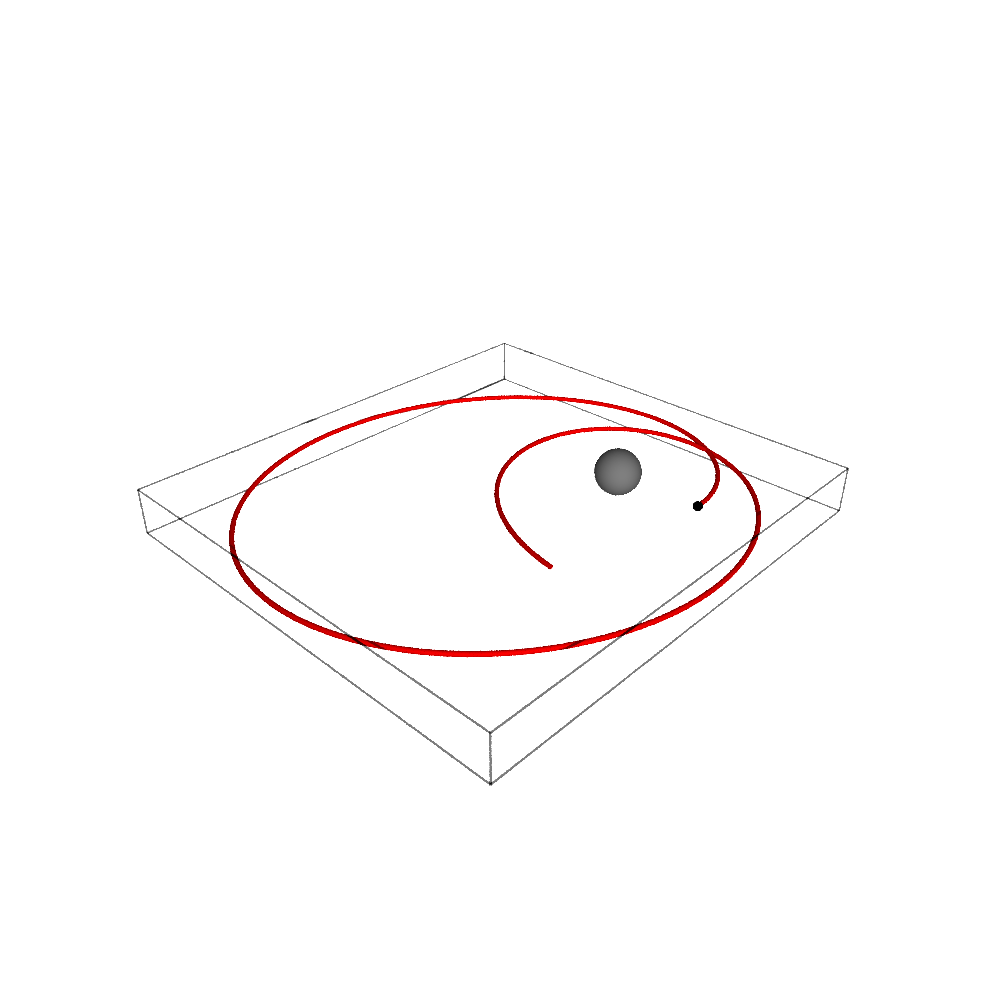

In [76]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod=M.integrated_geodesic(g,(s,0,700),v0)
geod.display()
#integración numérica
sol = geod.solve(parameters_values={m: 1}) 
#Interpolación de la solución para el ploteo
interp=geod.interpolate()
#Ploteando la geodésica. Se utiliza la carta X3, para llegar a ella, se utiliza
#la aplicación to_R3. Se plotean 500 puntos, espesor 2, sin etiquetar los ejes.
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500,
                           thickness=2, label_axes=False)
#más parámetros de la gráfica. El punto de inicio:
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        
#El horizonte de eventos en el origen de coordenadas representado como una esfera
graph += sphere(size=2, color='grey')
#show(graph, viewer='threejs', online=True)
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Tachyon view

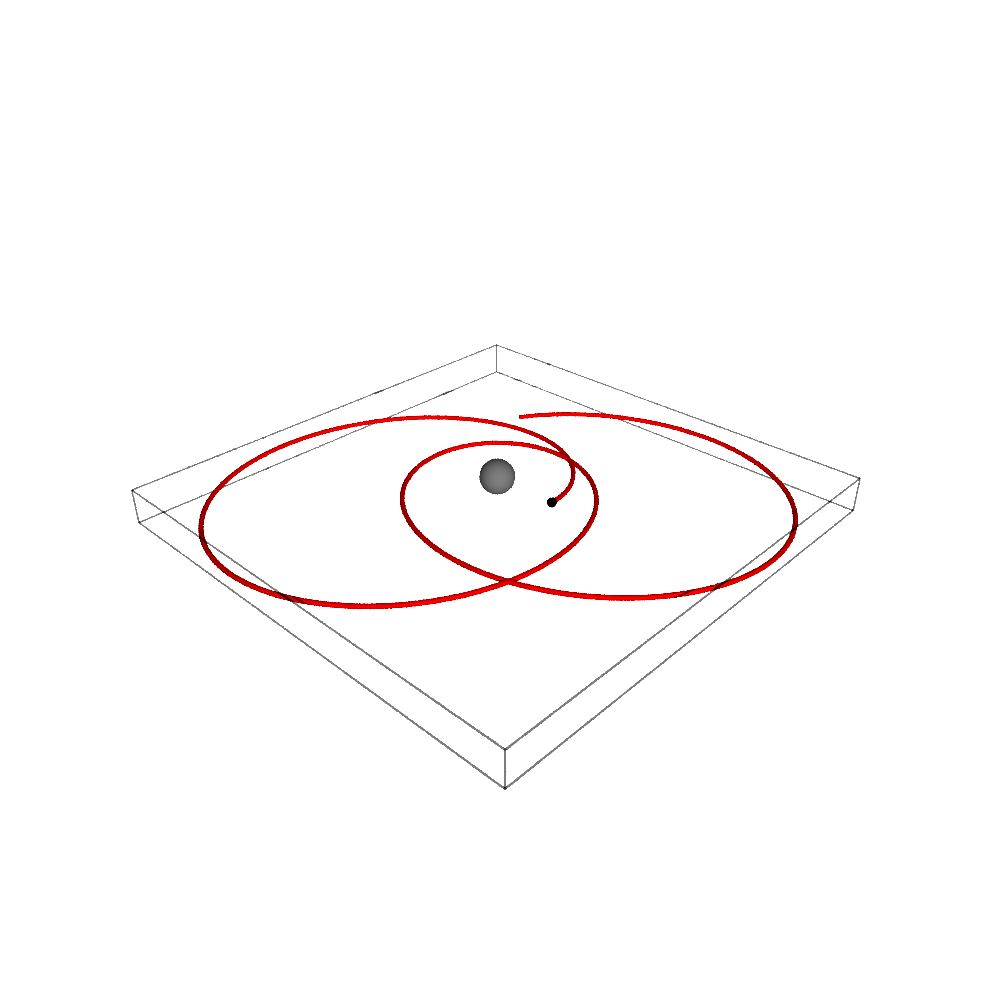

In [77]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod=M.integrated_geodesic(g,(s,0,1200),v0)
geod.display()
#integración numérica
sol = geod.solve(parameters_values={m: 1}) 
#Interpolación de la solución para el ploteo
interp=geod.interpolate()
#Ploteando la geodésica. Se utiliza la carta X3, para llegar a ella, se utiliza
#la aplicación to_R3. Se plotean 500 puntos, espesor 2, sin etiquetar los ejes.
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500,
                           thickness=2, label_axes=False)
#más parámetros de la gráfica. El punto de inicio:
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        
#El horizonte de eventos en el origen de coordenadas representado como una esfera
graph += sphere(size=2, color='grey')
#show(graph, viewer='threejs', online=True)
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

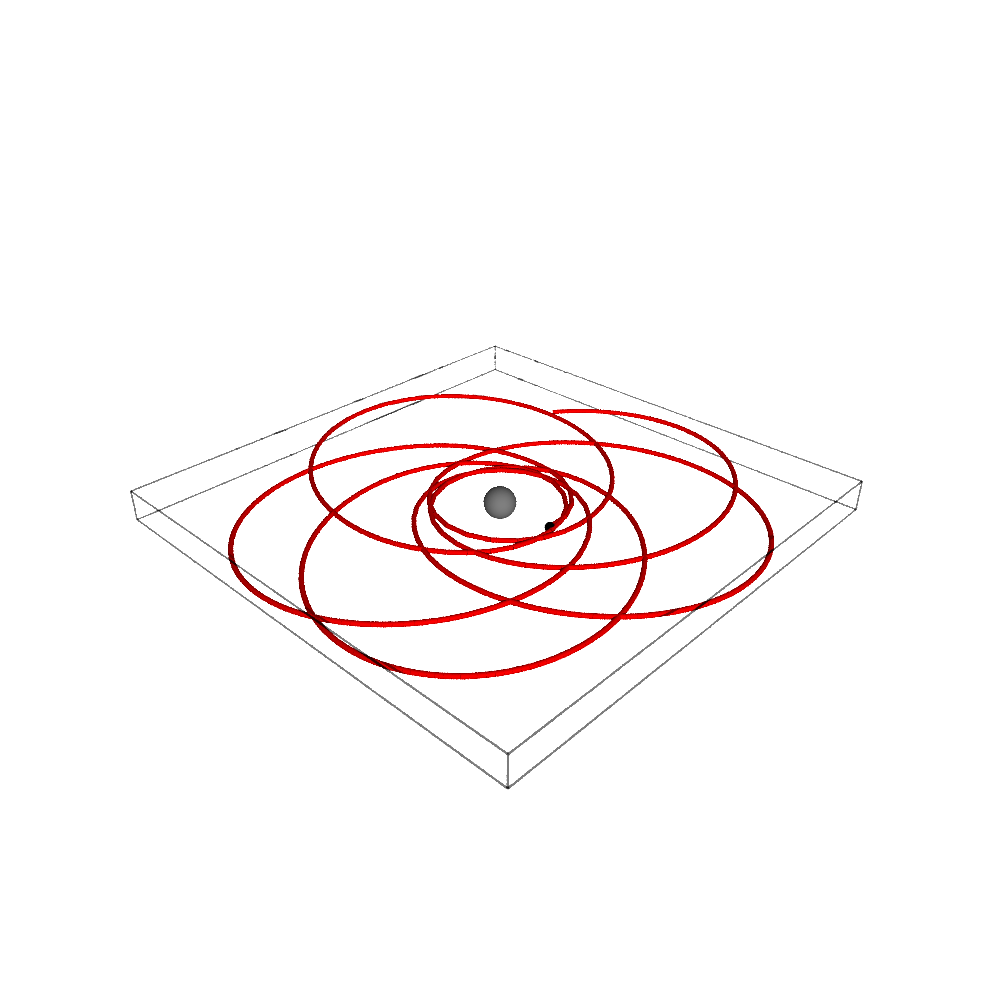

In [78]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod=M.integrated_geodesic(g,(s,0,3000),v0)
geod.display()
#integración numérica
sol = geod.solve(parameters_values={m: 1}) 
#Interpolación de la solución para el ploteo
interp=geod.interpolate()
#Ploteando la geodésica. Se utiliza la carta X3, para llegar a ella, se utiliza
#la aplicación to_R3. Se plotean 500 puntos, espesor 2, sin etiquetar los ejes.
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500,
                           thickness=2, label_axes=False)
#más parámetros de la gráfica. El punto de inicio:
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        
#El horizonte de eventos en el origen de coordenadas representado como una esfera
graph += sphere(size=2, color='grey')
#show(graph, viewer='threejs', online=True)
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Detalles de la solución

In [14]:
geod.system(verbose=True)

Geodesic in the 4-dimensional Lorentzian manifold M equipped with Lorentzian metric g on the 4-dimensional Lorentzian manifold M, and integrated over the Real interval (0, 1500) as a solution to the following geodesic equations, written with respect to Chart (M, (t, r, th, ph)):

Initial point: Point p_0 on the 4-dimensional Lorentzian manifold M with coordinates [0, 8*m, 1/2*pi, 1.00000000000000e-12] with respect to Chart (M, (t, r, th, ph))
Initial tangent vector: Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M with components [1.29751300000000, 0, 0, 0.0640625000000000/m] with respect to Chart (M, (t, r, th, ph))

d(t)/ds = Dt
d(r)/ds = Dr
d(th)/ds = Dth
d(ph)/ds = Dph
d(Dt)/ds = 2*Dr*Dt*m/(2*m*r - r^2)
d(Dr)/ds = -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4)
d(Dth)/ds = (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r
d(Dph)/ds = -2*(Dph*Dth*

[[2*Dr*Dt*m/(2*m*r - r^2),
  -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4),
  (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r,
  -2*(Dph*Dth*r*cos(th) + Dph*Dr*sin(th))/(r*sin(th))],
 Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M,
 Chart (M, (t, r, th, ph))]